In [77]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pyperch.neural.backprop_nn import BackpropModule
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from torch import nn, optim
from skorch import NeuralNetClassifier
from sklearn.datasets import load_diabetes
import time




Note: you may need to restart the kernel to use updated packages.


In [97]:
data = load_diabetes()
X = data.data
y = data.target
X2 = pd.DataFrame(X, columns=data.feature_names)
y2 = pd.DataFrame(y, columns=["target"])
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

##Download both the datasets and Preprocess
#Missing Data Found in Bmarketing| Added One Hot Encoding and padded missing data

In [85]:
bank_marketing = pd.read_csv('/workspaces/7641HW1/data/BankMarketingData.csv')
# data = load_breast_cancer()
# X = data.data
# y = data.target
# X2 = pd.DataFrame(X, columns=data.feature_names)
# y2 = pd.DataFrame(y, columns=["target"])


# breast_cancer = fetch_ucirepo(id=17)
# X2 = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.feature_names)
# y2 = pd.DataFrame(breast_cancer.data.targets)
# # y2 = pd.DataFrame(data.target)
dataset_2 = pd.concat([X2, y2], axis=1)
scaler = StandardScaler()
num_var =  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
dataset_2[num_var] = scaler.fit_transform(dataset_2[num_var])
#print(y2.value_counts())
dataset_2['target'] = (dataset_2['target'] > 125).astype(int)
cols = list(dataset_2.columns)
cols.insert(0, cols.pop(cols.index('target')))
dataset_2 = dataset_2[cols]

#bankmarketing preprocessing
bank_marketing['y'] = bank_marketing['y'].replace({'yes': 1, 'no': 0}).astype('category')
bank_marketing = bank_marketing.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.replace('unknown', x.mode()[0]).fillna(x.mode()[0]))
bank_marketing['previous_contact'] = bank_marketing['pdays'].apply(lambda x: False if x == 999 else True)
numerical_cols = bank_marketing.select_dtypes(include=['number']).columns.tolist()
bank_marketing[numerical_cols]=scaler.fit_transform(bank_marketing[numerical_cols])
categorical_cols = bank_marketing.select_dtypes(include=['object']).columns.tolist()
X1_encoded = pd.get_dummies(bank_marketing, columns=categorical_cols)
bank_marketing = X1_encoded
cols = list(bank_marketing.columns)
cols.insert(0, cols.pop(cols.index('y')))
bank_marketing = bank_marketing[cols]
# Last_Column = bank_marketing.iloc[:, -1]  # This selects the last column
# y1 = pd.DataFrame(Last_Column)
# Last_Column = bank_marketing.iloc[:, -1] 
# y1 = pd.DataFrame(Last_Column)
# y1['y'] = y1['y'].replace({'yes': 1, 'no': 0})
# all_except_last = bank_marketing.iloc[:, :-1]  # This selects all columns except the last one
# # Step 3: Create a new DataFrame with the selected columns
# X1 = pd.DataFrame(all_except_last)
#bank_marketing['previous_contact'] = bank_marketing['pdays'].apply(lambda x: False if x == 999 else True)
# categorical_cols = X1.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_cols = X1.select_dtypes(include=['number']).columns.tolist()
# X1[numerical_cols]=scaler.fit_transform(X1[numerical_cols])
# X1 = X1.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' 
#                      else x.replace('unknown', x.mode()[0]).fillna(x.mode()[0]))
# X1_encoded = pd.get_dummies(X1, categorical_cols)
# X1 = X1_encoded

In [86]:
dataset_2

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,0,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,1,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,1,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...,...
437,1,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,0,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,1,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,1,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


##Helper Functions for 
 Loading the Data,
 Running the Models,
 Showcasing the Results

In [87]:
def loading_data():
    X1 = np.array(bank_marketing.values[:,1:-1].astype(np.float32))
    y1 = np.array(bank_marketing.values[:,0].ravel().astype(np.int64))
    X2 = np.array(dataset_2.values[:,1:-1].astype(np.float32))
    y2 = np.array(dataset_2.values[:,0].ravel().astype(np.int64))
    return X1,y1,X2,y2

Start the ML Code

In [88]:
bmX,bmY, cX,cY = loading_data()

Hidden Units

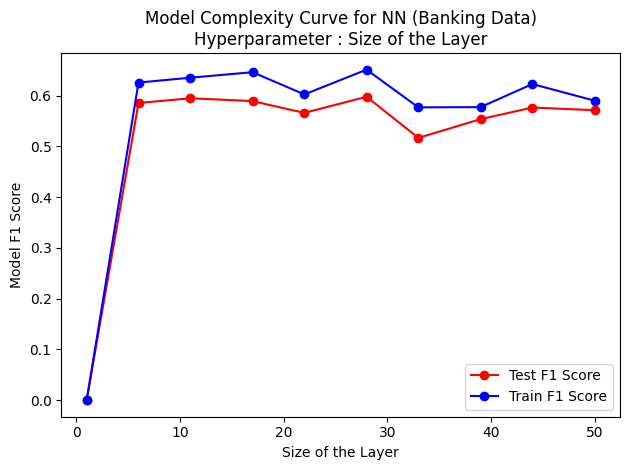

In [41]:
#BM
Xtrain,Xtest,ytrain,ytest = train_test_split(bmX,bmY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []

hlist = np.linspace(1,50,10).astype('int')
for i in hlist:
        
        mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.1, max_iter=300, random_state=25,verbose=False)
        mlp.fit(Xtrain, ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))

plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
plt.ylabel('Model F1 Score')
plt.xlabel('Size of the Layer')
title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : Size of the Layer"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
# plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
# plt.ylabel('Model Accuracy Score')
# plt.xlabel('No. Hidden Units')
# title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
# plt.title(title)
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

# plt.plot(hlist, recall_test, 'o-', color='r', label='Test Recall Score')
# plt.plot(hlist, recall_train, 'o-', color = 'b', label='Train Recall Score')
# plt.ylabel('Model Recall Score')
# plt.xlabel('No. Hidden Units')
# title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
# plt.title(title)
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

# plt.plot(hlist, precision_test, 'o-', color='r', label='Test Precision Score')
# plt.plot(hlist, precision_train, 'o-', color = 'b', label='Train Precision Score')
# plt.ylabel('Model Precision Score')
# plt.xlabel('No. Hidden Units')
# title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
# plt.title(title)
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()




#accuracy = accuracy_score(y_test, y_pred)


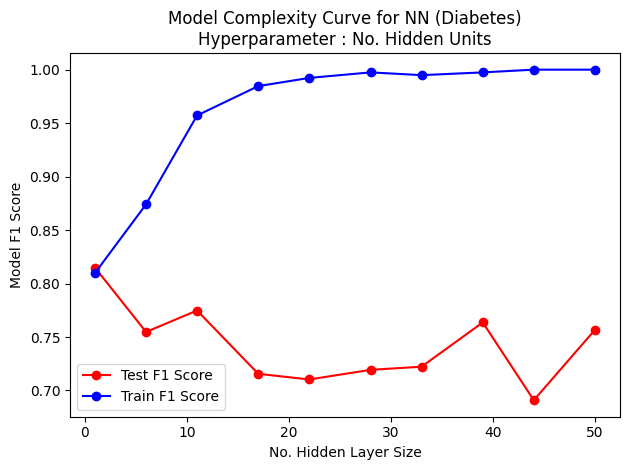

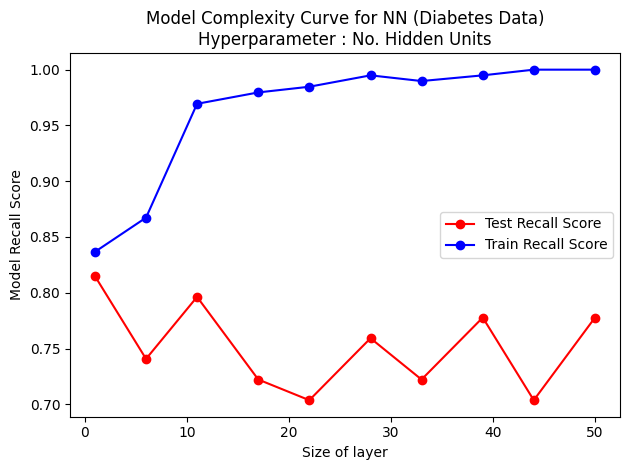

In [90]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cX,cY,test_size=.20,random_state=52)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []

hlist = np.linspace(1,50,10).astype('int')
for i in hlist:
        
        mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.05, max_iter=300, random_state=10,verbose=False)
        mlp.fit(Xtrain, ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))

plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
plt.ylabel('Model F1 Score')
plt.xlabel('No. Hidden Layer Size')
title="Model Complexity Curve for NN (Diabetes)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
# plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
# plt.ylabel('Model Accuracy Score')
# plt.xlabel('No. Hidden Layer Size')
# title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Units"    
# plt.title(title)
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

plt.plot(hlist, recall_test, 'o-', color='r', label='Test Recall Score')
plt.plot(hlist, recall_train, 'o-', color = 'b', label='Train Recall Score')
plt.ylabel('Model Recall Score')
plt.xlabel('Size of layer')
title="Model Complexity Curve for NN (Diabetes Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# plt.plot(hlist, precision_test, 'o-', color='r', label='Test Precision Score')
# plt.plot(hlist, precision_train, 'o-', color = 'b', label='Train Precision Score')
# plt.ylabel('Model Precision Score')
# plt.xlabel('No. Hidden Layer Size')
# title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Units"    
# plt.title(title)
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

Hidden # of Layers

In [94]:
def hidden_layer_configs(X,Y, title):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=.10,random_state=25)
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
    hidden_layer_configs = [(10,) * i for i in range(1, 30)]
    lengths = list(range(1, 30))

    for hidden_layer_configs in hidden_layer_configs:
        #print(f"Training with hidden layer configuration: {hidden_layer_configs}")
        mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_configs, 
        solver='adam', 
        activation='logistic', 
        learning_rate_init=0.1, 
        max_iter=300, 
        random_state=10,
        alpha=0.1,
        verbose=False)
    
        mlp.fit(Xtrain,ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))
    
# Convert the list to a NumPy array
    
    plt.plot(lengths, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(lengths, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Layers')
    title=title
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # plt.plot(lengths, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    # plt.plot(lengths, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    # plt.ylabel('Model Accuracy Score')
    # plt.xlabel('No. Hidden Layers')
    # title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    # plt.title(title)
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()

    plt.plot(lengths, recall_test, 'o-', color='r', label='Test Recall Score')
    plt.plot(lengths, recall_train, 'o-', color = 'b', label='Train Recall Score')
    plt.ylabel('Model Recall Score')
    plt.xlabel('No. Hidden Layers')
    title=title    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # plt.plot(lengths, precision_test, 'o-', color='r', label='Test Precision Score')
    # plt.plot(lengths, precision_train, 'o-', color = 'b', label='Train Precision Score')
    # plt.ylabel('Model Precision Score')
    # plt.xlabel('No. Hidden Layers')
    # title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    # plt.title(title)
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()

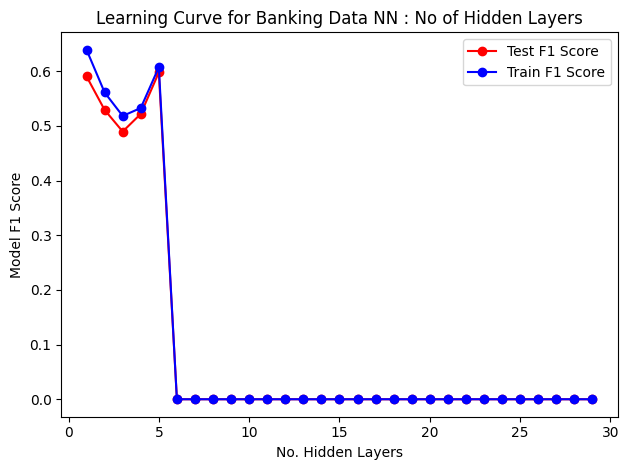

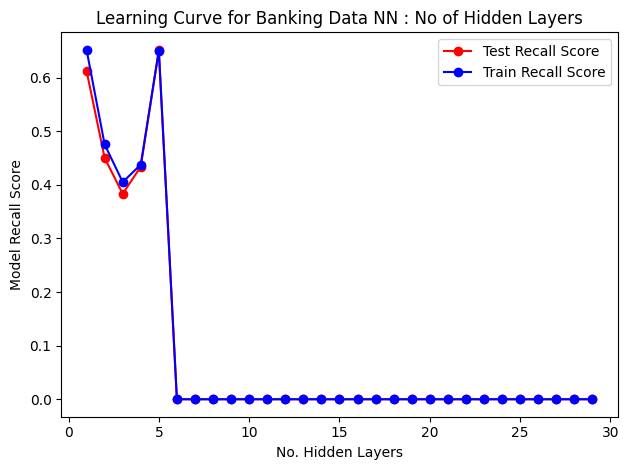

In [74]:
hidden_layer_configs(bmX,bmY, "Learning Curve for Banking Data NN : No of Hidden Layers")

#For Cancer Dataset

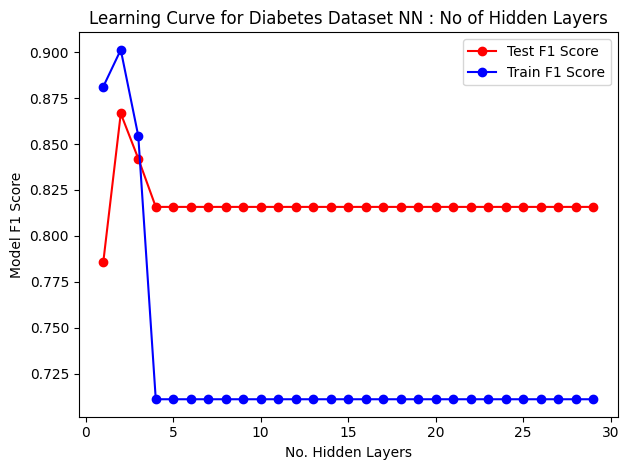

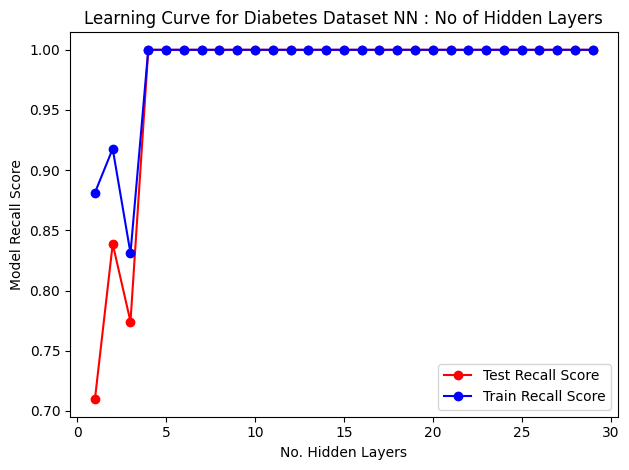

In [95]:
hidden_layer_configs(cX,cY,"Learning Curve for Diabetes Dataset NN : No of Hidden Layers")

In [58]:
def alpha(X,Y,title):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=.10,random_state=25)
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
    lr_alpha = np.linspace(0.001, 0.5, 50)
    

    for i in lr_alpha:
        #print(f"Training with hidden layer configuration: {hidden_layer_configs}")
        mlp = MLPClassifier(
        hidden_layer_sizes=(10,), 
        solver='adam', 
        activation='logistic', 
        learning_rate_init=i, 
        max_iter=300, 
        random_state=25,
        verbose=False)
    
        mlp.fit(Xtrain,ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))
    
# Convert the list to a NumPy array
    
    plt.plot(lr_alpha, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(lr_alpha, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('learning rate')
    title=title
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # plt.plot(lr_alpha, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    # plt.plot(lr_alpha, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    # plt.ylabel('Model Accuracy Score')
    # plt.xlabel('learning rate')
    # title=title   
    # plt.title(title)
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()

    plt.plot(lr_alpha, recall_test, 'o-', color='r', label='Test Recall Score')
    plt.plot(lr_alpha, recall_train, 'o-', color = 'b', label='Train Recall Score')
    plt.ylabel('Model Recall Score')
    plt.xlabel('learning rate')
    title=title   
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # plt.plot(lengths, precision_test, 'o-', color='r', label='Test Precision Score')
    # plt.plot(lengths, precision_train, 'o-', color = 'b', label='Train Precision Score')
    # plt.ylabel('Model Precision Score')
    # plt.xlabel('No. Hidden Layers')
    # title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    # plt.title(title)
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()

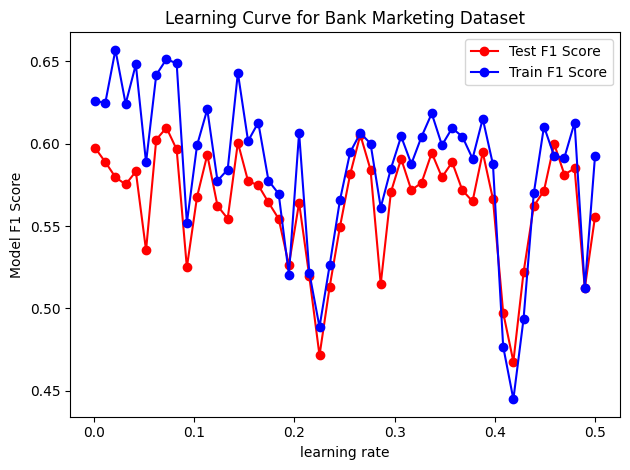

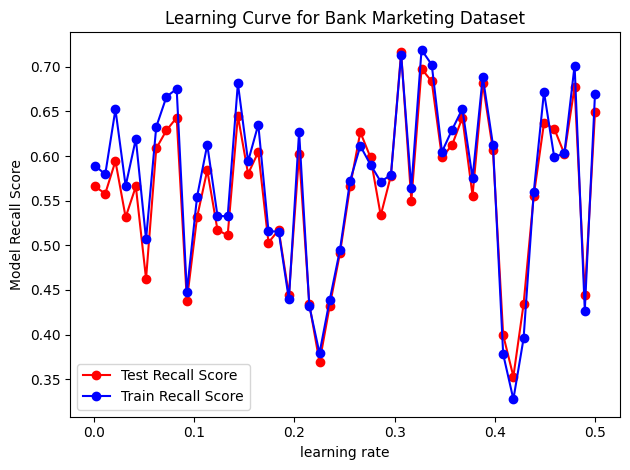

In [60]:
alpha(bmX,bmY,"Learning Curve for Bank Marketing Dataset")

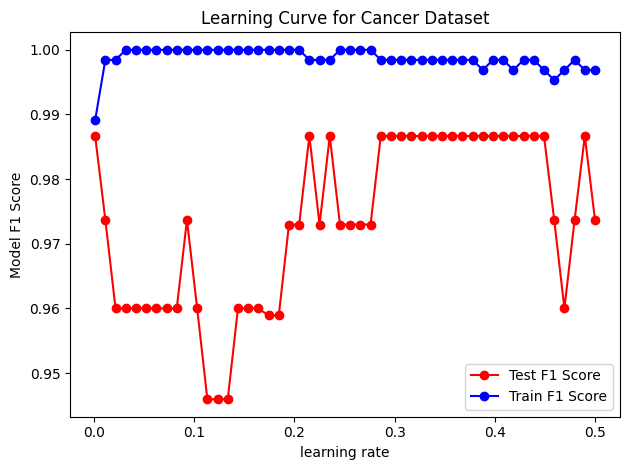

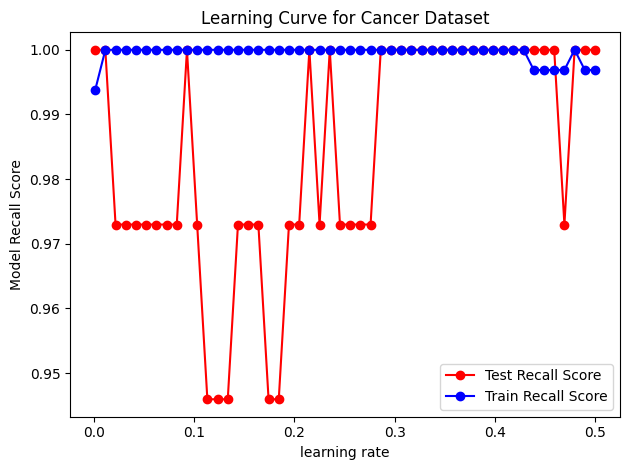

In [61]:
alpha(cX,cY,"Learning Curve for Cancer Dataset")

logistic


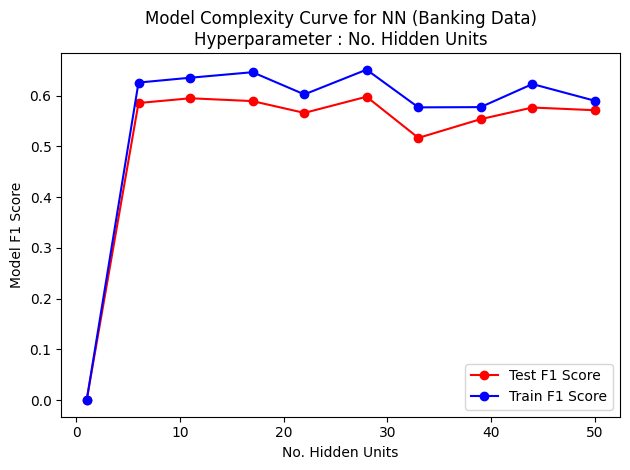

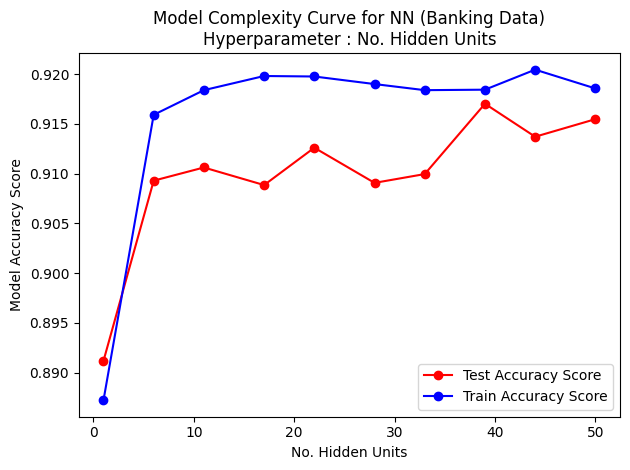

tanh


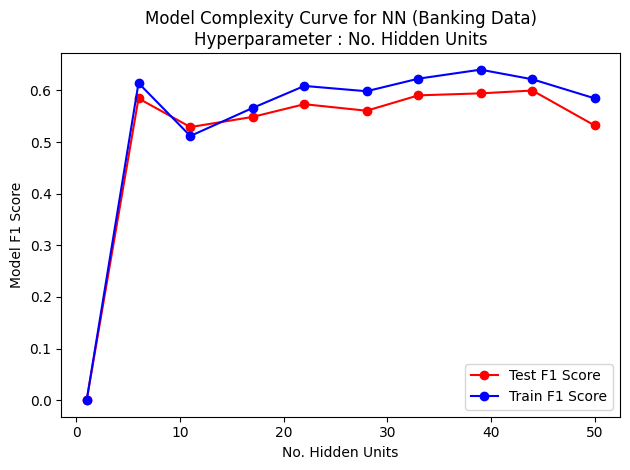

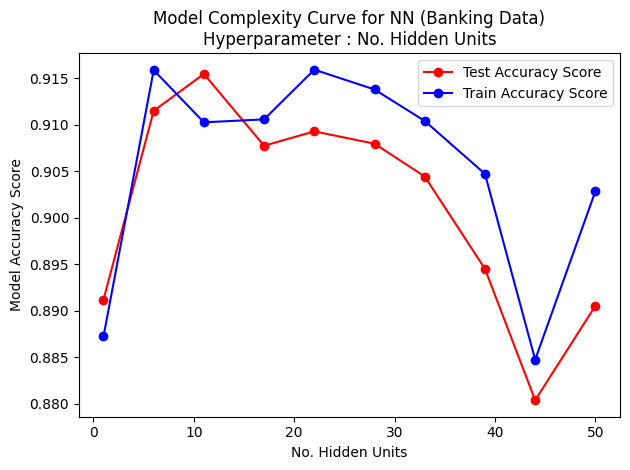

relu


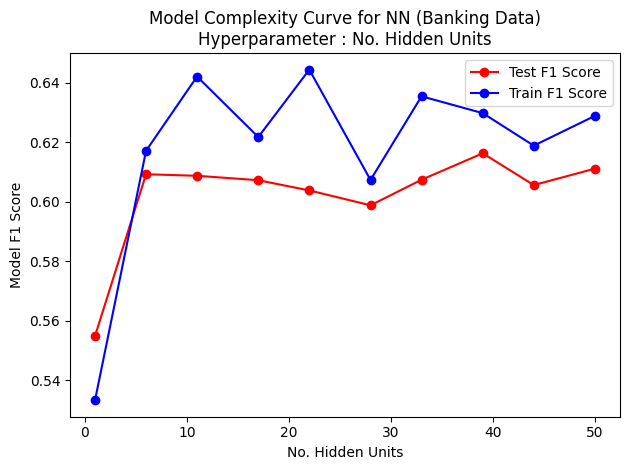

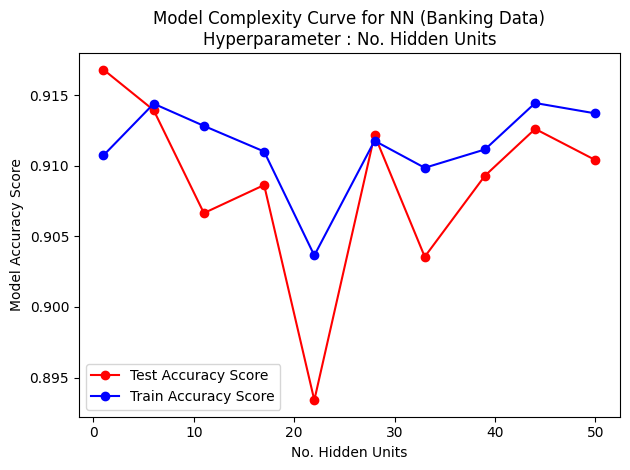

In [62]:
Xtrain,Xtest,ytrain,ytest = train_test_split(bmX,bmY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []
activation_lr = ['logistic','tanh','relu']

for k in activation_lr:
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
        
    hlist = np.linspace(1,50,10).astype('int')
    for i in hlist:
        
            mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation=k, 
                                learning_rate_init=0.1, max_iter=300, random_state=25)
            mlp.fit(Xtrain, ytrain)
            ypredtest = mlp.predict(Xtest)
            ypredtrain = mlp.predict(Xtrain)
            f1_test.append(f1_score(ytest, ypredtest))
            f1_train.append(f1_score(ytrain, ypredtrain))
            accuracy_test.append(accuracy_score(ytest, ypredtest))
            accuracy_train.append(accuracy_score(ytrain, ypredtrain))
            recall_test.append(recall_score(ytest, ypredtest))
            recall_train.append(recall_score(ytrain, ypredtrain))
            precision_test.append(precision_score(ytest, ypredtest))
            precision_train.append(precision_score(ytrain, ypredtrain))

    print(k)
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


logistic


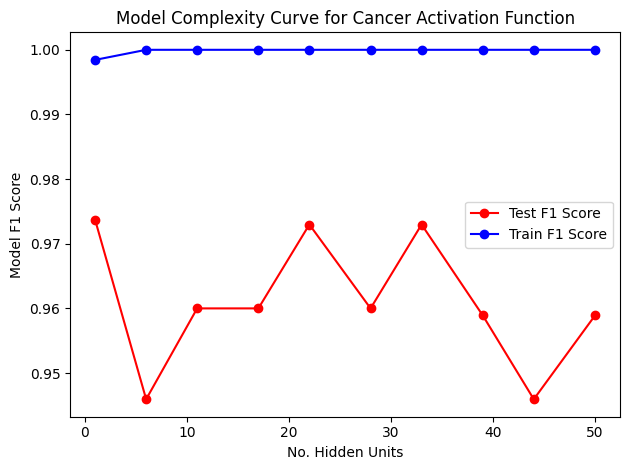

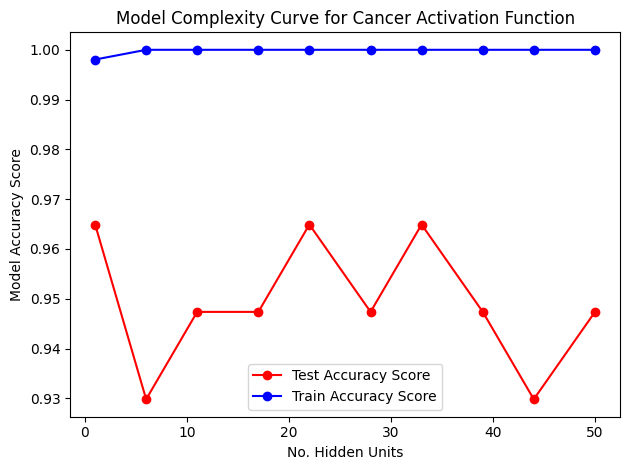

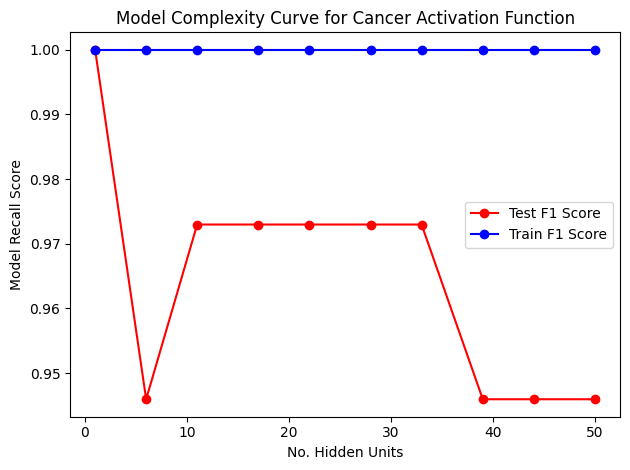

tanh


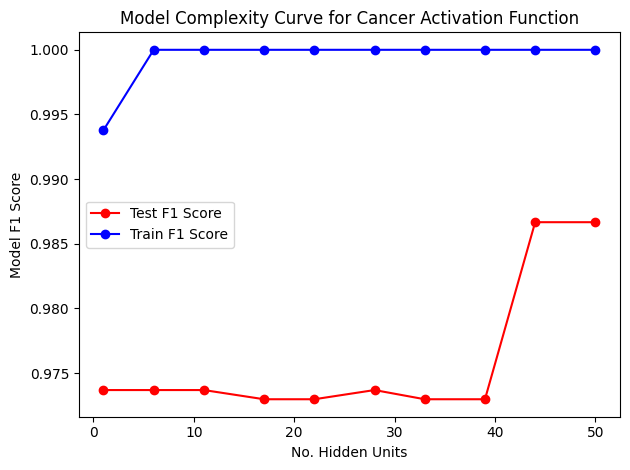

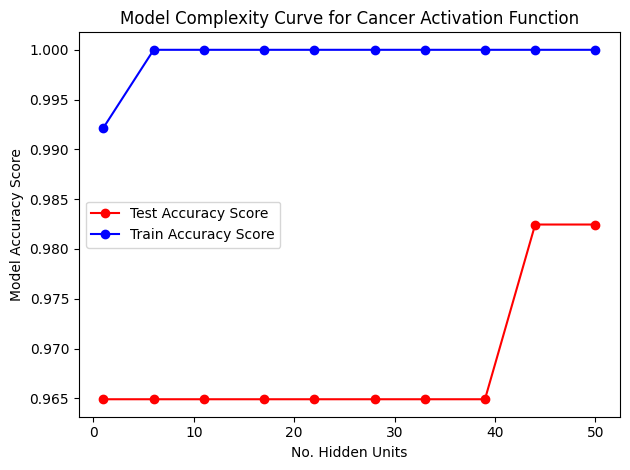

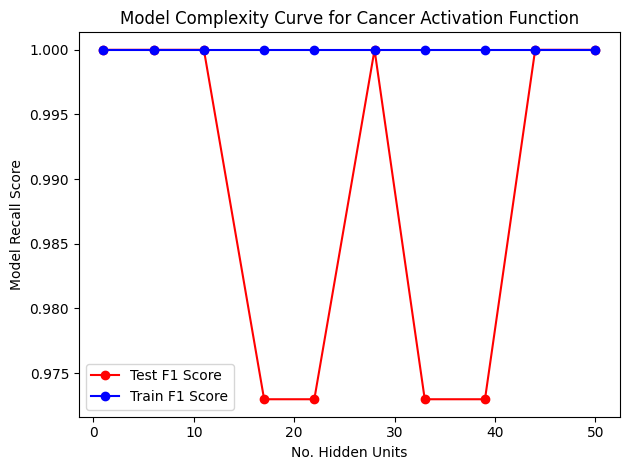

relu


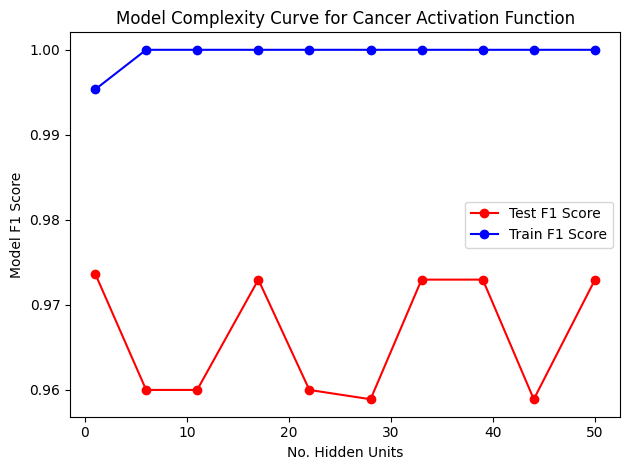

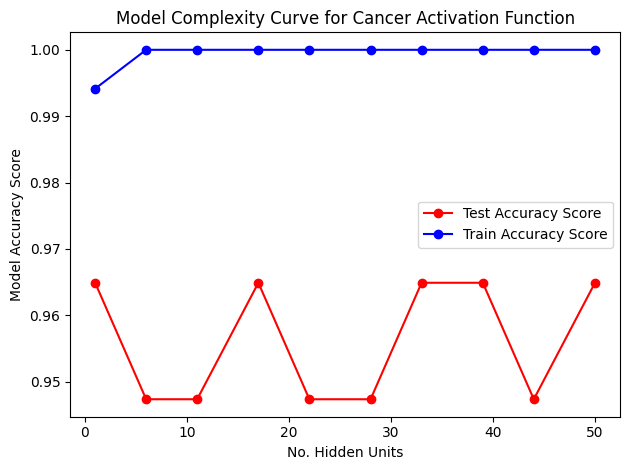

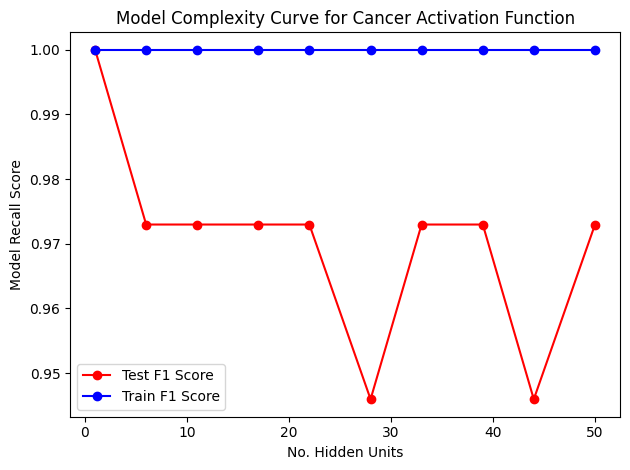

In [70]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cX,cY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []
activation_lr = ['logistic','tanh','relu']

for k in activation_lr:
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
        
    hlist = np.linspace(1,50,10).astype('int')
    for i in hlist:
        
            mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation=k, 
                                learning_rate_init=0.1, max_iter=300, random_state=25)
            mlp.fit(Xtrain, ytrain)
            ypredtest = mlp.predict(Xtest)
            ypredtrain = mlp.predict(Xtrain)
            f1_test.append(f1_score(ytest, ypredtest))
            f1_train.append(f1_score(ytrain, ypredtrain))
            accuracy_test.append(accuracy_score(ytest, ypredtest))
            accuracy_train.append(accuracy_score(ytrain, ypredtrain))
            recall_test.append(recall_score(ytest, ypredtest))
            recall_train.append(recall_score(ytrain, ypredtrain))
            precision_test.append(precision_score(ytest, ypredtest))
            precision_train.append(precision_score(ytrain, ypredtrain))

    print(k)
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for Cancer Activation Function"
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for Cancer Activation Function"  
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(hlist, recall_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, recall_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model Recall Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for Cancer Activation Function"
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [64]:
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
    
activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=bmX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=200,
    verbose=0,
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(bmX,bmY)
#y_proba = net.predict_proba(X2.values.astype(np.float32))
       


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): Sigmoid()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=57, out_features=1, bias=True)
      (1): Linear(in_features=1, out_features=1, bias=True)
      (2): Linear(in_features=1, out_features=2, bias=True)
    )
  ),
)

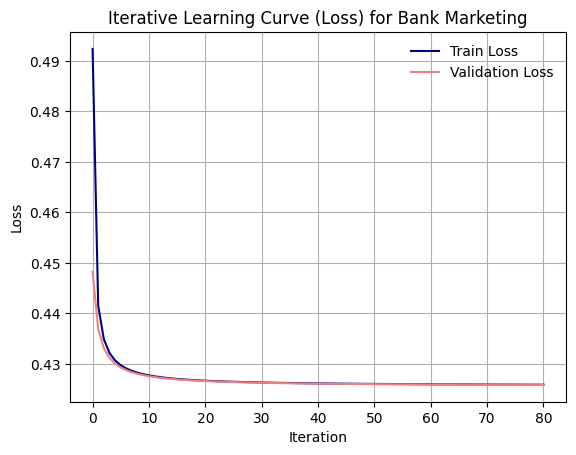

In [65]:
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Bank Marketing")
plt.grid(visible=True)
plt.legend(frameon=False)

In [66]:
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
    
activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=cX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=200,
    verbose=0,
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(cX,cY)
#y_proba = net.predict_proba(X2.values.astype(np.float32))

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): Sigmoid()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=29, out_features=1, bias=True)
      (1): Linear(in_features=1, out_features=1, bias=True)
      (2): Linear(in_features=1, out_features=2, bias=True)
    )
  ),
)

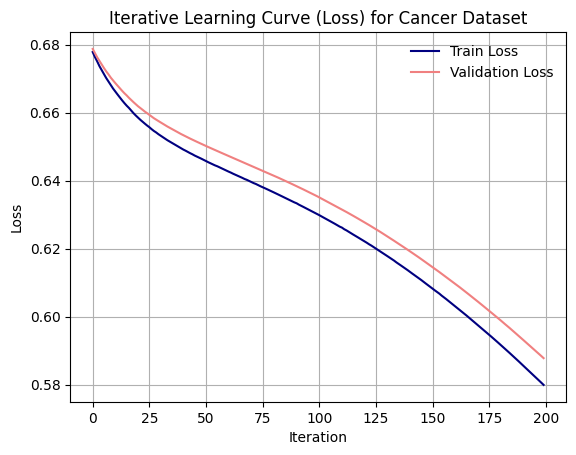

In [67]:
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Cancer Dataset")
plt.grid(visible=True)
plt.legend(frameon=False)

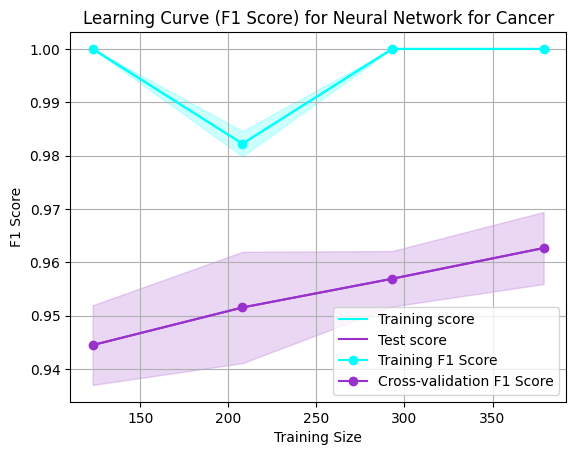

In [68]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score

net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)


X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
# Create a custom scorer using F1 score
f1_scorer = make_scorer(f1_score, average='macro')


# Plot the learning curve


train_sizes, train_scores, test_scores = learning_curve(
    net, cX, cY, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=f1_scorer
)



train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Test score", color='darkorchid')
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.grid(visible=True)
plt.legend(frameon=False)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='cyan', label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorchid', label="Cross-validation F1 Score")
plt.title("Learning Curve (F1 Score) for Neural Network for Cancer")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(loc="best")
plt.show()

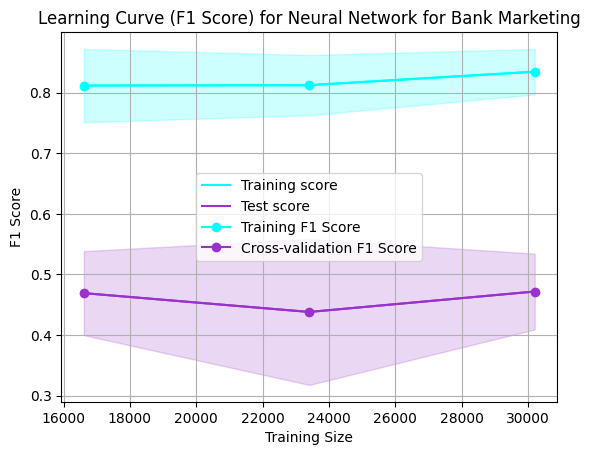

In [28]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score
import time

net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
# Create a custom scorer using F1 score
f1_scorer = make_scorer(f1_score, average='macro')

#train_start_time = time.time()
# Plot the learning curve


train_sizes, train_scores, test_scores = learning_curve(
    net, bmX, bmY, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=f1_scorer
)



train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Test score", color='darkorchid')
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.grid(visible=True)
plt.legend(frameon=False)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='cyan', label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorchid', label="Cross-validation F1 Score")
plt.title("Learning Curve (F1 Score) for Neural Network for Bank Marketing")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(loc="best")
plt.show()

Above chart - Needs more love to as the the F1 Score is not imporving   

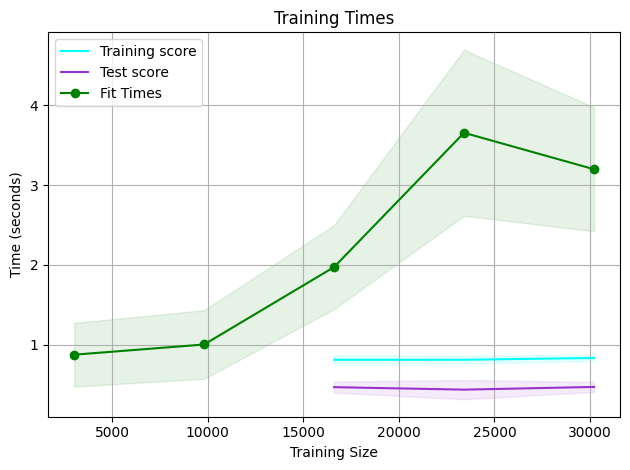

Total training duration: 32.85 seconds


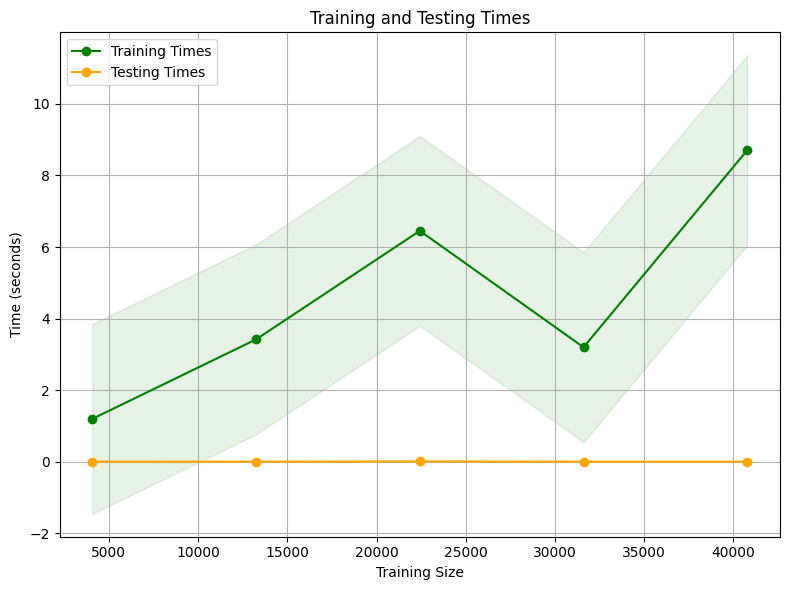

Average training duration: 4.5959 seconds
Average test duration: 0.0062 seconds


In [8]:
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

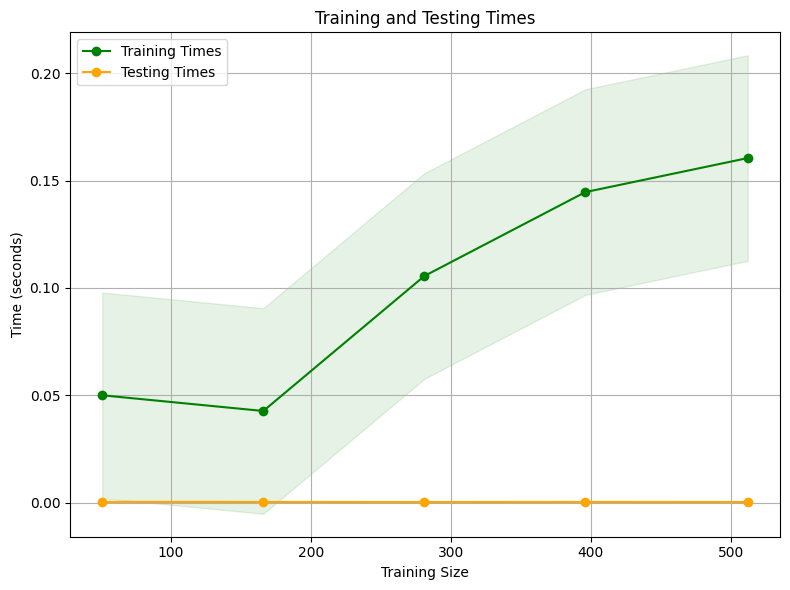

Average training duration: 0.1007 seconds
Average test duration: 0.0003 seconds


In [9]:
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

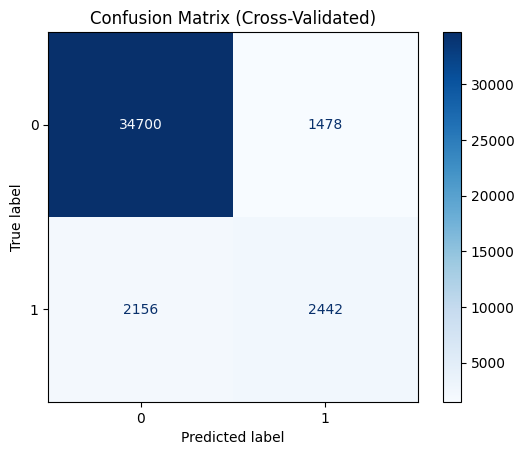

Cross-validated F1 scores: [0.76940789 0.76944142 0.74730247 0.76228127 0.75771922]
Mean F1 score: 0.7612304546165374
Standard deviation of F1 score: 0.008266945440364383


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, f1_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Example data (replace with your actual data)
# X = ... (your feature data)
# y = ... (your label data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(net, X_train, y_train, cv=5)

# Calculate F1 scores using cross-validation
f1_scorer = make_scorer(f1_score, average='macro')
cv_scores = cross_val_score(net, X_train, y_train, cv=5, scoring=f1_scorer)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

# Print the cross-validated F1 scores
print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")
print(f"Standard deviation of F1 score: {cv_scores.std()}")

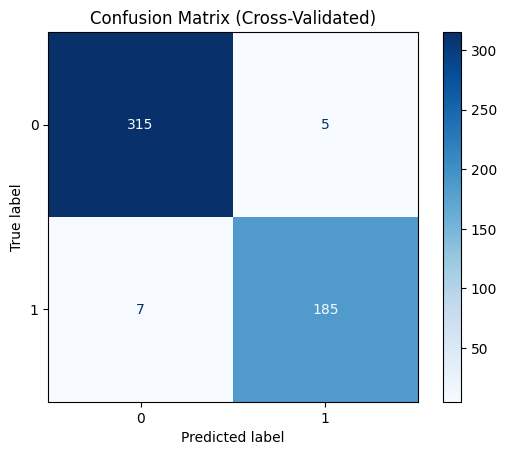

Cross-validated recall scores: [0.94591346 0.97936699 0.97902961 0.97368421 0.9921875 ]
Mean recall score: 0.9740363529014845
Standard deviation of recall score: 0.015322097733756318


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Example data (replace with your actual data)
# X = ... (your feature data)
# y = ... (your label data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(net, X_train, y_train, cv=5)

# Calculate recall scores using cross-validation
recall_scorer = make_scorer(recall_score, average='macro')
cv_scores = cross_val_score(net, X_train, y_train, cv=5, scoring=recall_scorer)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

# Print the cross-validated recall scores
print(f"Cross-validated recall scores: {cv_scores}")
print(f"Mean recall score: {cv_scores.mean()}")
print(f"Standard deviation of recall score: {cv_scores.std()}")

KNN now

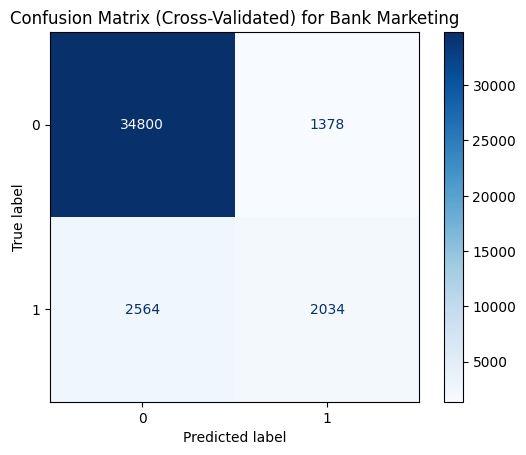

Cross-validated F1 scores: [0.72618522 0.7333008  0.72216917 0.73140534 0.7225406 ]
Mean F1 score: 0.7271202255604682
Standard deviation of F1 score: 0.004536999746582178


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can set n_neighbors to the desired number
X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(knn, X_train, y_train, cv=5)

# Calculate F1 scores using cross-validation
f1_scorer = make_scorer(f1_score, average='macro')
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=f1_scorer)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated) for Bank Marketing")
plt.show()

# Print the cross-validated F1 scoresb
print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")
print(f"Standard deviation of F1 score: {cv_scores.std()}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can set n_neighbors to the desired number
X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(knn, X_train, y_train, cv=5)

# Calculate F1 scores using cross-validation
f1_scorer = make_scorer(f1_score, average='macro')
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=f1_scorer)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated) for Bank Marketing")
plt.show()

# Print the cross-validated F1 scoresb
print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")
print(f"Standard deviation of F1 score: {cv_scores.std()}")

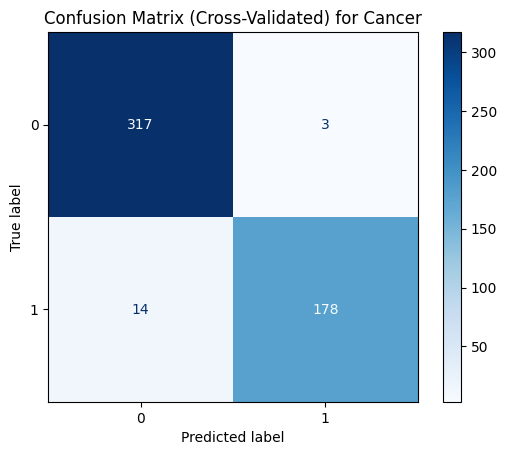

Cross-validated recall scores: [0.94090545 0.97435897 0.96587171 0.96587171 0.94736842]
Mean recall score: 0.9588752530364373
Standard deviation of recall score: 0.012593391206165596


In [18]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can set n_neighbors to the desired number
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(knn, X_train, y_train, cv=5)

# Calculate recall scores using cross-validation
recall_scorer = make_scorer(recall_score, average='macro')
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=recall_scorer)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated) for Cancer")
plt.show()

# Print the cross-validated recall scores
print(f"Cross-validated recall scores: {cv_scores}")
print(f"Mean recall score: {cv_scores.mean()}")
print(f"Standard deviation of recall score: {cv_scores.std()}")

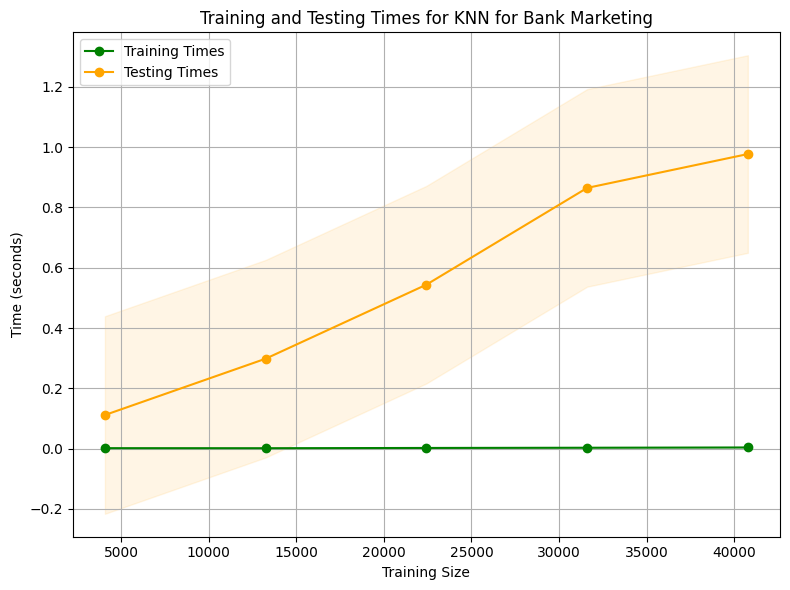

Average training duration: 0.0026 seconds
Average test duration: 0.5593 seconds


In [23]:
X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)  # You can set n_neighbors to the desired number

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    knn.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    knn.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times for KNN for Bank Marketing")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

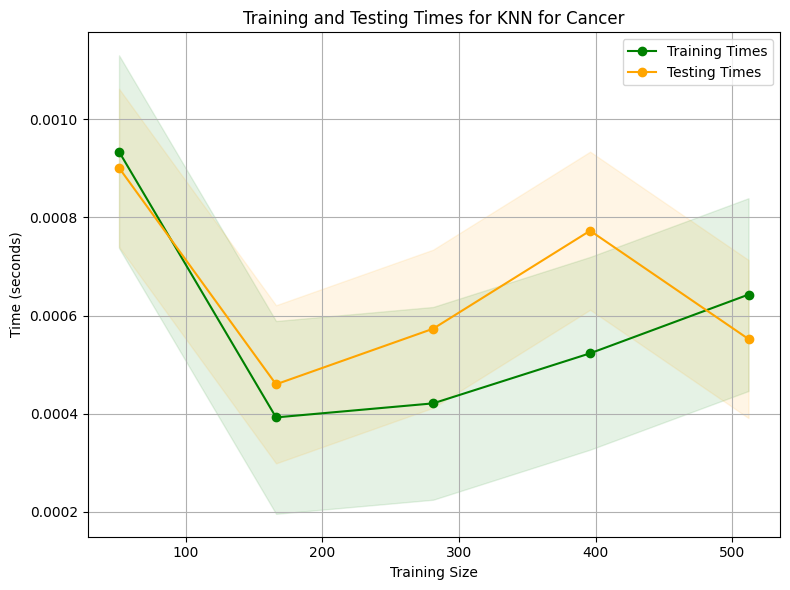

Average training duration: 0.0006 seconds
Average test duration: 0.0007 seconds


In [22]:
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)  # You can set n_neighbors to the desired number

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    knn.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    knn.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times for KNN for Cancer")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score
import time

X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
knn = KNeighborsClassifier(n_neighbors=5)

# Create a custom scorer using F1 score
f1_scorer = make_scorer(f1_score, average='macro')

#train_start_time = time.time()
# Plot the learning curve


train_sizes, train_scores, test_scores = learning_curve(
    net, bmX, bmY, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=f1_scorer
)



train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Test score", color='darkorchid')
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.grid(visible=True)
plt.legend(frameon=False)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='cyan', label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorchid', label="Cross-validation F1 Score")
plt.title("Learning Curve (F1 Score) for Neural Network for Bank Marketing")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(loc="best")
plt.show()

NameError: name 'learning_curve' is not defined